In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql 


In [2]:
# load the Social_Network_Ads dataset 

Hdata = pd.read_csv(r"C:\Users\91772\Downloads\train.csv", header=0)

# Copy the file to back-up file

Hdata_bk = Hdata.copy()

# display first 5 records


Hdata.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2,3,66,348,48862,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1
1,2,3,66,348,48862,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1
2,2,3,66,348,48862,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1
3,2,3,66,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80
4,2,3,66,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21


In [3]:
Hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241179 entries, 0 to 241178
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   site_name                 241179 non-null  int64
 1   posa_continent            241179 non-null  int64
 2   user_location_country     241179 non-null  int64
 3   user_location_region      241179 non-null  int64
 4   user_location_city        241179 non-null  int64
 5   user_id                   241179 non-null  int64
 6   is_mobile                 241179 non-null  int64
 7   is_package                241179 non-null  int64
 8   channel                   241179 non-null  int64
 9   srch_adults_cnt           241179 non-null  int64
 10  srch_children_cnt         241179 non-null  int64
 11  srch_rm_cnt               241179 non-null  int64
 12  srch_destination_id       241179 non-null  int64
 13  srch_destination_type_id  241179 non-null  int64
 14  is_booking          

In [4]:
del Hdata['user_id']
del Hdata['is_mobile']
del Hdata['site_name']

In [5]:
Hdata.isnull().sum()

posa_continent              0
user_location_country       0
user_location_region        0
user_location_city          0
is_package                  0
channel                     0
srch_adults_cnt             0
srch_children_cnt           0
srch_rm_cnt                 0
srch_destination_id         0
srch_destination_type_id    0
is_booking                  0
cnt                         0
hotel_continent             0
hotel_country               0
hotel_market                0
hotel_cluster               0
dtype: int64

In [6]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in Hdata.columns:
    if col != 'is_booking':
        IndepVar.append(col)

TargetVar = 'is_booking'

x = Hdata[IndepVar]
y = Hdata[TargetVar]

In [7]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((192943, 16), (48236, 16), (192943,), (48236,))

In [8]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [9]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\Users\91772\Desktop\aiml\HTResults.csv", header=0)
EMResults.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\91772\\Desktop\\aiml\\HTResults.csv'

Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0  4052]
 [   14 44170]]
Outcome values : 
 0 4052 14 44170
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      4052
           0       0.92      1.00      0.96     44184

    accuracy                           0.92     48236
   macro avg       0.46      0.50      0.48     48236
weighted avg       0.84      0.92      0.88     48236

Accuracy : 91.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.005
roc_auc_score: 0.5


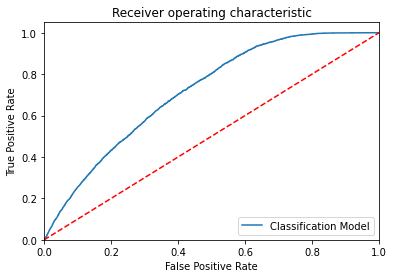

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  267  3785]
 [ 3352 40832]]
Outcome values : 
 267 3785 3352 40832
Classification report : 
               precision    recall  f1-score   support

           1       0.07      0.07      0.07      4052
           0       0.92      0.92      0.92     44184

    accuracy                           0.85     48236
   macro avg       0.49      0.50      0.49     48236
weighted avg       0.84      0.85      0.85     48236

Accuracy : 85.2 %
Precision : 7.4 %
Recall : 6.6 %
F1 Score : 0.07
Specificity or True Negative Rate : 92.4 %
Balanced Accuracy : 49.5 %
MCC : -0.01
roc_auc_score: 0.495


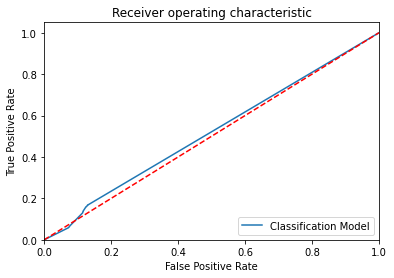

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   90  3962]
 [ 1943 42241]]
Outcome values : 
 90 3962 1943 42241
Classification report : 
               precision    recall  f1-score   support

           1       0.04      0.02      0.03      4052
           0       0.91      0.96      0.93     44184

    accuracy                           0.88     48236
   macro avg       0.48      0.49      0.48     48236
weighted avg       0.84      0.88      0.86     48236

Accuracy : 87.8 %
Precision : 4.4 %
Recall : 2.2 %
F1 Score : 0.03
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 48.9 %
MCC : -0.03
roc_auc_score: 0.489


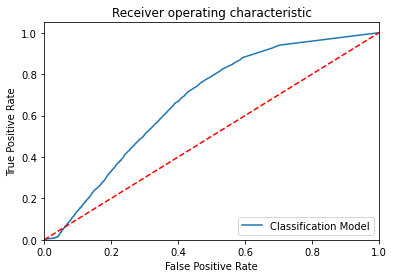

-----------------------------------------------------------------------------------------------------


In [ ]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters
#ModelLin= LinearRegression()

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,  modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [10]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(20)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,LogisticRegression(),NaN,NaN,NaN,NaN,0.916,0.000,0.000,0.000,1.000,-0.005,0.499864,0.500,4052.0,12.0,44172.0,0.0
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,0.854,0.076,0.065,0.070,0.927,-0.008,0.496058,0.496,3787.0,3238.0,40946.0,265.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,NaN,0.877,0.046,0.023,0.031,0.955,-0.029,0.489226,0.489,3957.0,1988.0,42196.0,95.0
3,"(ExtraTreeClassifier(random_state=1628647352),...",NaN,NaN,NaN,NaN,0.872,0.040,0.023,0.029,0.950,-0.035,0.486377,0.486,3960.0,2207.0,41977.0,92.0
4,KNeighborsClassifier(),NaN,NaN,NaN,NaN,0.909,0.124,0.014,0.025,0.991,0.014,0.502429,0.502,3996.0,396.0,43788.0,56.0
5,(DecisionTreeClassifier(random_state=106166246...,NaN,NaN,NaN,NaN,0.875,0.049,0.026,0.034,0.953,-0.027,0.489711,0.490,3945.0,2076.0,42108.0,107.0
6,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,NaN,NaN,0.916,NaN,0.000,0.000,1.000,NaN,0.500000,0.500,4052.0,0.0,44184.0,0.0
7,LGBMClassifier(),NaN,NaN,NaN,NaN,0.916,0.333,0.000,0.000,1.000,0.007,0.500101,0.500,4051.0,2.0,44182.0,1.0
8,GaussianNB(),NaN,NaN,NaN,NaN,0.599,0.132,0.675,0.221,0.592,0.150,0.633656,0.634,1315.0,18034.0,26150.0,2737.0
